# Imports

In [1]:
# %pip install pandas
# %pip install matplotlib
# %pip install opencv-python-headless
# %pip install scikit-image
# %pip install basic-image-eda
# %pip install seaborn
# %pip install awswrangler

In [2]:
import os
import glob

import pandas as pd
import numpy as np

import cv2

import matplotlib.pyplot as plt
import matplotlib.image as mp_image
import seaborn as sns

from IPython.display import Image, display

import awswrangler as wr
import boto3 

In [3]:
cd /home/ec2-user/SageMaker/teledermatologyAI_capstone

/home/ec2-user/SageMaker/teledermatologyAI_capstone


# EDA

In [4]:
# credits: https://github.com/yuliyabohdan/Skin-diseases-classification-Dermnet-/blob/main/skin_diseases_clas_ResNet50.ipynb

DIR = 'data_class_folder8'
DIR_TRAIN = f'{DIR}/train/'
DIR_VAL = f'{DIR}/val/'
DIR_TEST = f'{DIR}/test/' 

classes = os.listdir(DIR_TRAIN)
print(f'Total classes: {len(classes)}')

# total train, val and test images
train_count = 0
val_count = 0
test_count = 0

classes_df = []
for _class in classes:
    class_dict = {}
    train_count += len(os.listdir(DIR_TRAIN + _class))
    val_count += len(os.listdir(DIR_VAL + _class))
    test_count += len(os.listdir(DIR_TEST + _class))
    class_dict.update({'Class': _class, 
                       'Train': len(os.listdir(DIR_TRAIN + _class)),
                       'Val': len(os.listdir(DIR_VAL + _class)),
                       'Test': len(os.listdir(DIR_TEST + _class)) })
    classes_df.append(class_dict)

print(f'Total num train images: {train_count}')
print(f'Total num val images: {val_count}')
print(f'Total num test images: {test_count}')
print(pd.DataFrame(classes_df))

Total classes: 5
Total num train images: 18072
Total num val images: 3576
Total num test images: 2418
                                               Class  Train  Val  Test
0                       Non-Cancerous Skin Condition   3610  696   495
1  Toxin, Fungal, Bug, Viral, or Bacterial Infect...   3660  722   458
2                             Benign Marking or Mole   3616  721   486
3                  Potentially Malignant Skin Tumors   3622  724   456
4                                       Unclassified   3564  713   523


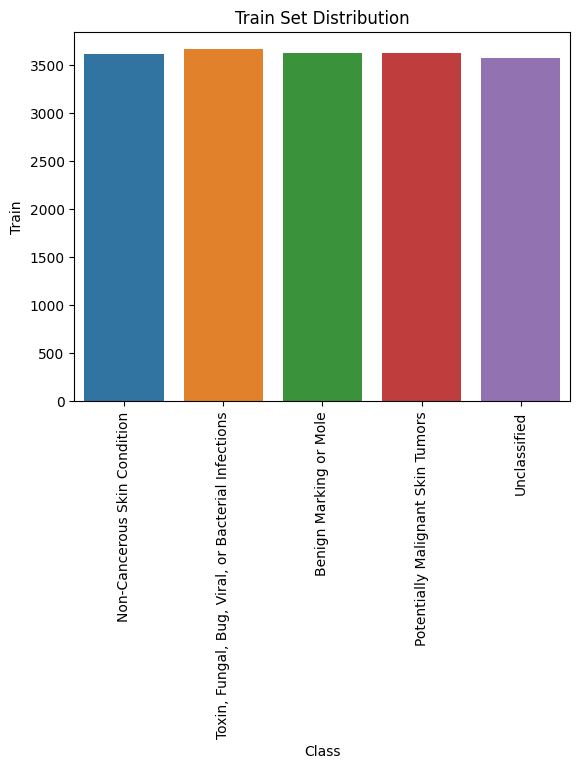

In [5]:
sns.barplot(data=pd.DataFrame(classes_df), 
            x='Class', y='Train').set_title('Train Set Distribution')
plt.xticks(rotation=90);

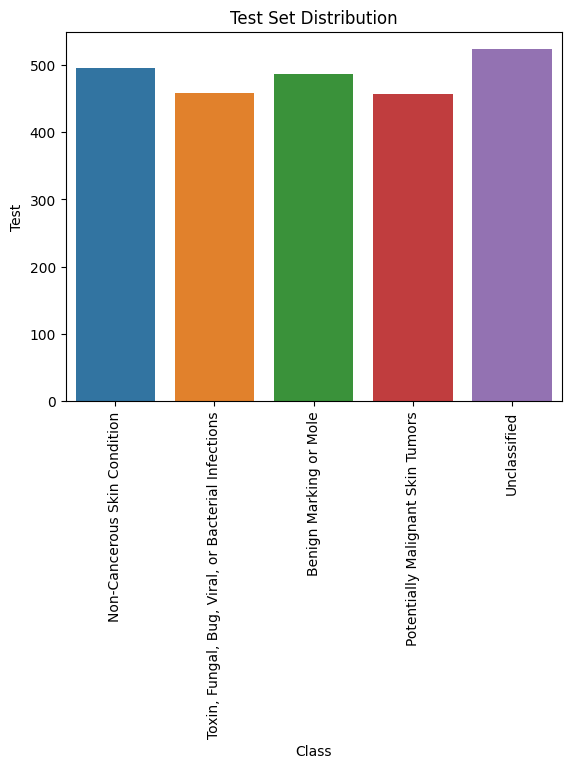

In [6]:
sns.barplot(data=pd.DataFrame(classes_df), 
            x='Class', y='Test').set_title('Test Set Distribution')
plt.xticks(rotation=90);

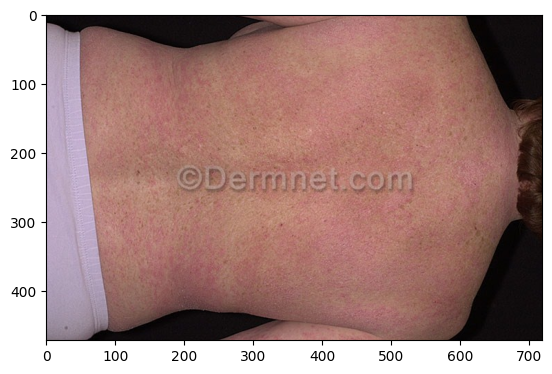

In [8]:
root = 'data_class_folder8/train'
folder = 'Non-Cancerous Skin Condition'

file_name = os.listdir(os.path.join(root, folder))[5]
file_path = os.path.join(root, folder, file_name)
image = mp_image.imread(file_path)
image_plot = plt.imshow(image)
image_plot;

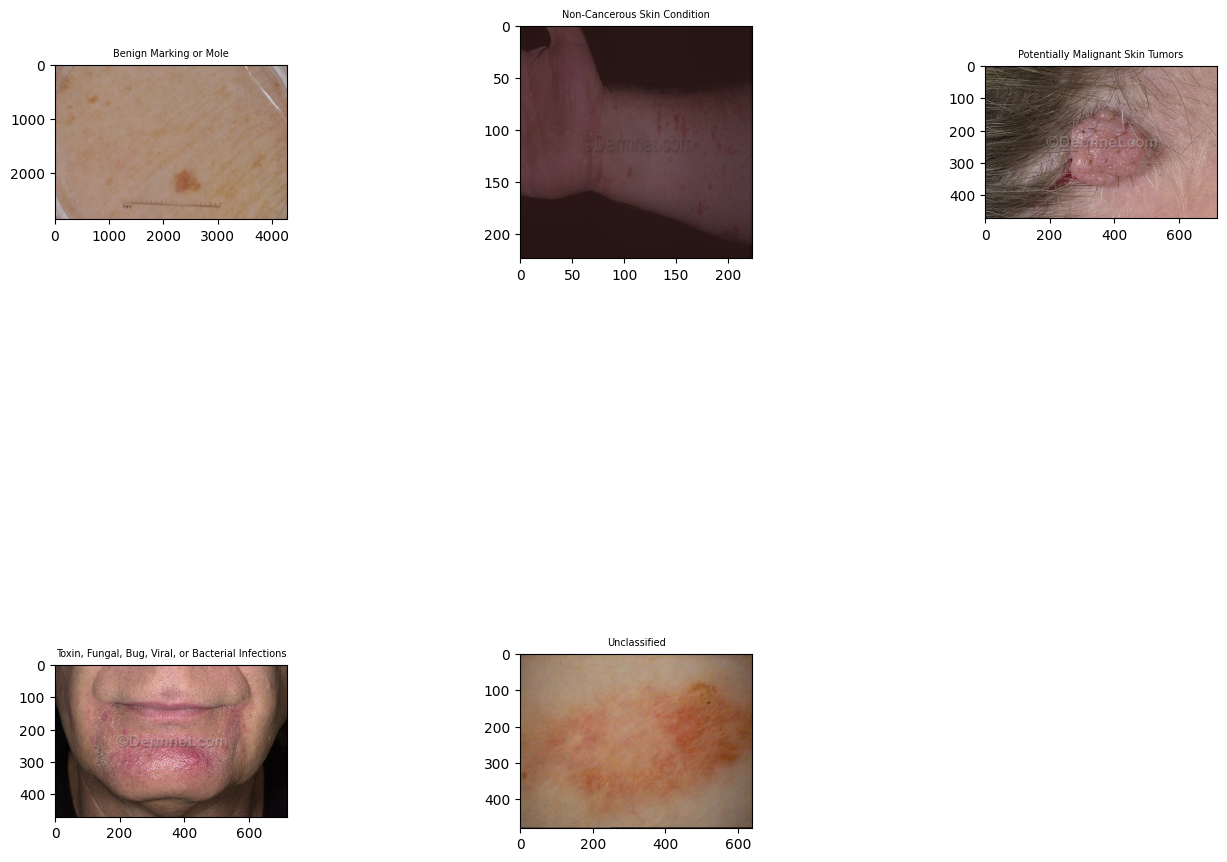

In [9]:
fig = plt.figure(figsize=(15, 35))

# loop through the subfolders
for root, folders, filenames in os.walk(DIR_TRAIN):
    image_num = 0
    num_folders = len(folders)
    for folder in sorted(folders):
        image_num +=1
        file_name = os.listdir(os.path.join(root,folder))[1] # 6th image for each folder
        file_path = os.path.join(root,folder, file_name)
        image = mp_image.imread(file_path)
        a = fig.add_subplot(num_folders, 3, image_num)
        image_plot = plt.imshow(image)
        a.set_title(folder, fontdict={'fontsize':7})
        
fig.subplots_adjust(hspace=1, wspace=1);

# Basic Information of Images (Size, Channel & etc.)


found 18072 images.
Using 16 threads. (max:16)



100%|██████████| 18072/18072 [07:41<00:00, 39.15it/s] 



*--------------------------------------------------------------------------------------*
number of images                         |  18072

dtype                                    |  uint8
channels                                 |  [3, 4]
extensions                               |  ['jpg', 'png']

min height                               |  79
max height                               |  6000
mean height                              |  831.2266489597167
median height                            |  472

min width                                |  155
max width                                |  6000
mean width                               |  1094.5723218238159
median width                             |  640

mean height/width ratio                  |  0.7594076995978639
median height/width ratio                |  0.7375
recommended input size(by mean)          |  [ 832 1096] (h x w, multiples of 8)
recommended input size(by mean)          |  [ 832 1088] (h x w, multiples of 16)
recomme

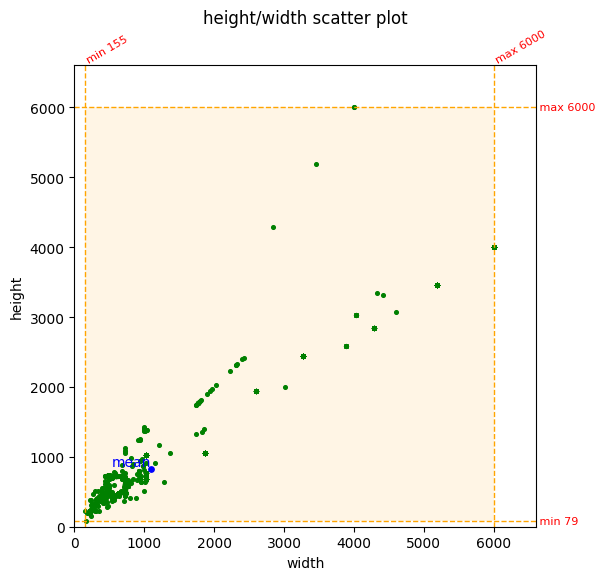

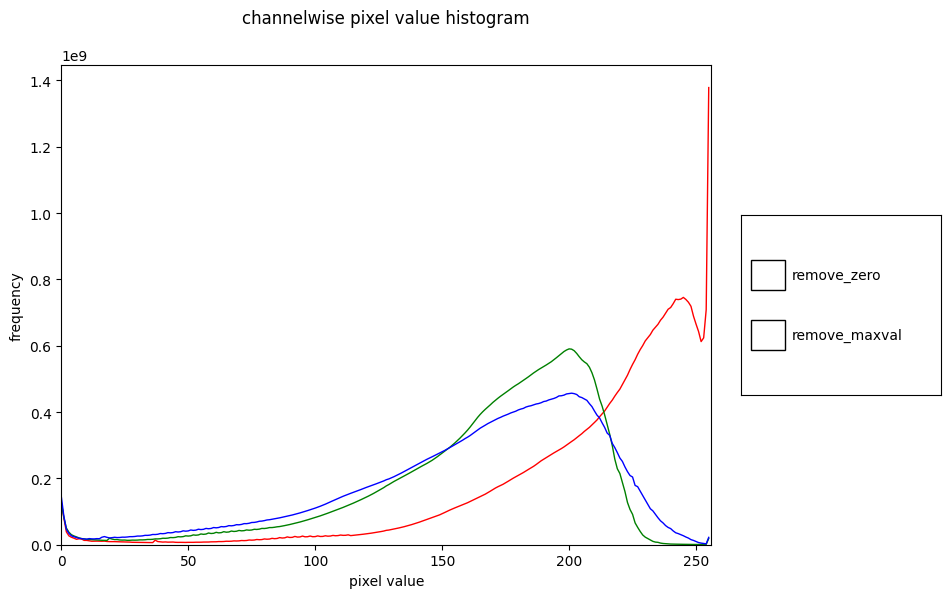

In [10]:
# credits: https://github.com/Soongja/basic-image-eda
from basic_image_eda import BasicImageEDA

if __name__ == "__main__":  # for multiprocessing
    data_dir = DIR_TRAIN
    # BasicImageEDA.explore(data_dir)
        
    # or
    
    extensions = ['png', 'jpg', 'jpeg']
    threads = 0
    dimension_plot = True
    channel_hist = True
    nonzero = False
    hw_division_factor = 1.0
    
    BasicImageEDA.explore(data_dir, extensions, threads, dimension_plot, channel_hist, nonzero, hw_division_factor)

# Generate Average Image

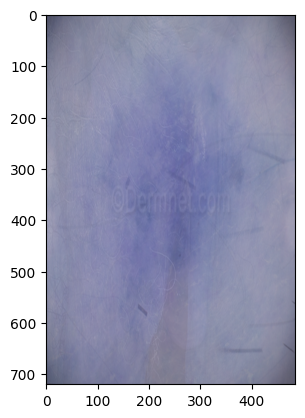

In [11]:
# credits: https://leslietj.github.io/2020/06/28/How-to-Average-Images-Using-OpenCV/

# import all image files with the .jpg extension
images = glob.glob(f'{DIR_TRAIN}Potentially Malignant Skin Tumors/*.jpg')

image_data = []
for img in images:
    this_image = cv2.imread(img, 1)
    image_data.append(this_image)

avg_image = image_data[0]
for i in range(len(image_data)):
    if i == 0:
        pass
    else:
        dim = (avg_image.shape[1], avg_image.shape[0])
        resized = cv2.resize(image_data[i], dim)
        avg_image = cv2.addWeighted(resized, 0.3, avg_image, 0.7, 0.0)

img_name = 'images/avg_potentially_malignant_merged.png'
cv2.imwrite(img_name, avg_image)
avg_image = cv2.imread(img_name)
plt.imshow(avg_image)
plt.show()

In [12]:
avg_image.shape

(720, 485, 3)